<a href="https://colab.research.google.com/github/Devansharma/Air_Quaity_Index_Prediction/blob/master/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle

In [ ]:
df = pd.read_csv('Real_Combine.csv')
df = df.dropna()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

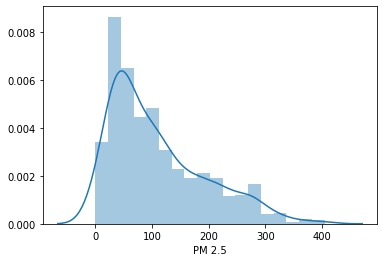

In [ ]:
sns.distplot(y)

In [ ]:
tree = DecisionTreeRegressor(criterion='mse')

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print("R2(train data): {}".format(tree.score(X_train, y_train)))

R2(train data): 1.0


In [ ]:
print("R2(test data): {}".format(tree.score(X_test, y_test)))

R2(test data): 0.7555937273401184


In [ ]:
score = cross_val_score(tree, X, y, cv=10)

In [ ]:
score.mean()

0.4435970412292788

In [ ]:
prediction = tree.predict(X_test)

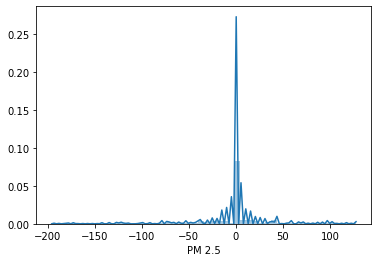

In [ ]:
sns.distplot(y_test-prediction)

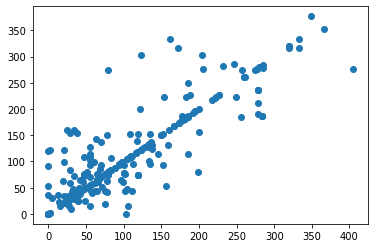

In [ ]:
plt.scatter(y_test, prediction)

In [ ]:
params={
    'splitter':['best','random'],
    'max_depth':[3,5,6,4,10,12,15],
    'min_samples_leaf': [1,2,3,4,5,6],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
    'max_features': ['auto', 'log2', 'sqrt', None],
    'max_leaf_nodes': [None, 10,20,30,40,50,60]
}

In [ ]:
GSCV = GridSearchCV(tree, param_grid=params, scoring='neg_mean_squared_error', cv=10, verbose=3)

In [ ]:
%%time
GSCV.fit(X,y)

In [47]:
GSCV.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [48]:
GSCV.best_score_

-3131.6489619178874

In [49]:
prediction = GSCV.predict(X_test)

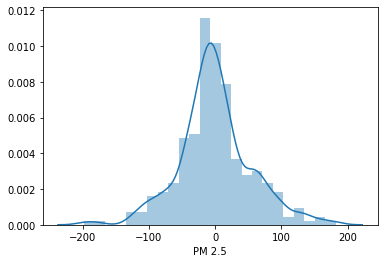

In [50]:
sns.distplot(y_test-prediction)

In [58]:
print("R2(train data): {}".format(GSCV.score(X_train, y_train)))
print("R2(test data): {}".format(GSCV.score(X_test, y_test)))

R2(train data): -2891.854211318732
R2(test data): -3019.273737821712


In [53]:
print("MAE: ",metrics.mean_absolute_error(y_test, prediction))
print("MSE: ",metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  39.9577829601377
MSE:  3019.273737821712
RMSE:  54.94791841209012


In [55]:
file = open('DecisionTreeRegressor.pkl','wb')
pickle.dump(GSCV, file)